In [1]:
import os
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1)


%matplotlib inline

In [2]:
#Datos


Total_time = 250 #4.1666666 min * 60 sec/min
data_per_sec = 32000 / 250 # 128
Time_inicio = 10
slides_inicio = Time_inicio * data_per_sec
slides_inicio

ventana_estabilidad = 640 # 5seg
ventana_total = 29000

In [3]:
def import_raw_data():
    
    col = ['AF3', 'F3', 'T7', 'O1', 'P8', 'FC6', 'F8']
    
    dataset = []
    
    for filename in os.listdir("./data"):
        data = pandas.read_csv("./data/"+filename)
        dataset.append(data[col].loc[slides_inicio:slides_inicio + ventana_total - 1,:])
        
    return dataset

In [4]:
data = import_raw_data()

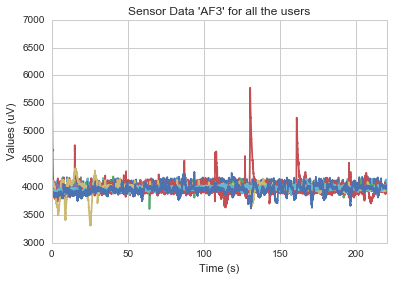

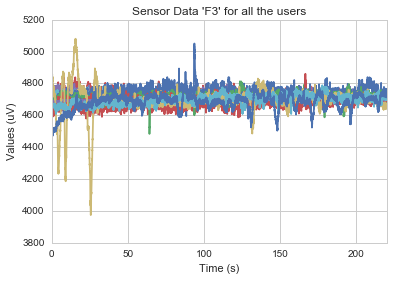

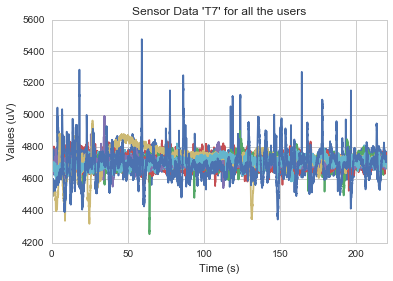

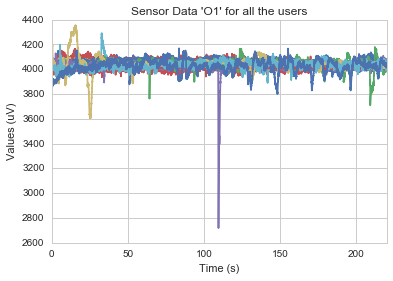

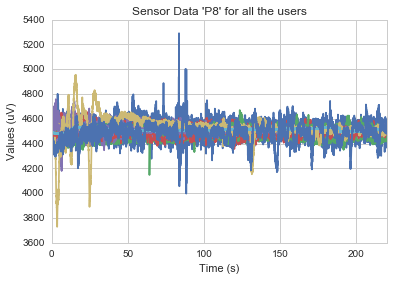

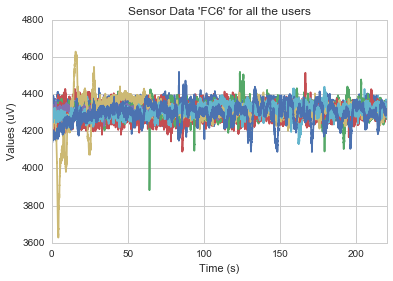

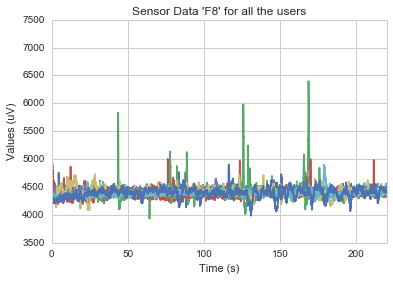

In [6]:
count = 0
cols = data[0].columns
X = [i/128.0 for i in range(29000)]

for c in cols:
    for i in data:
        plt.plot(X,i[c])
    plt.title("Sensor Data '" + c + "' for all the users" )
    plt.ylabel("Values (uV)")
    plt.xlabel("Time (s)")
    plt.xlim([0,220])
    #plt.savefig(c + '_comparison.png', dpi=180)
    plt.show()
    



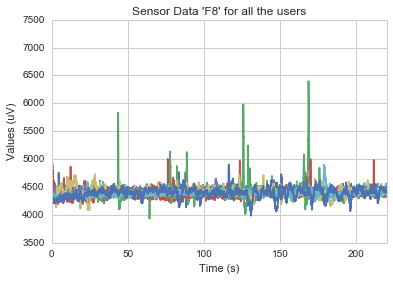

In [16]:
#hacer uno a uno, si no no hace bien las imagenes
c = 'F8'
for i in data:
    plt.plot(X,i[c])
plt.title("Sensor Data '" + c + "' for all the users" )
plt.ylabel("Values (uV)")
plt.xlabel("Time (s)")
plt.xlim([0,220])
plt.savefig('./pngs/sensor/' + c + '_comparison.png', dpi=180)
#plt.show()